In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

In [2]:
from pathlib import Path
path = Path("/Smart Ad/UTKFace")

In [3]:
filenames = list(map(lambda x: x.name, path.glob('*.jpg')))
print(len(filenames))
print(filenames[:3])

23708
['100_0_0_20170112213500903.jpg.chip.jpg', '100_0_0_20170112215240346.jpg.chip.jpg', '100_1_0_20170110183726390.jpg.chip.jpg']


Data Preprocessing

In [4]:
#Shuffle the data to increase the randomness of data (remove biasness)
np.random.seed(10)
np.random.shuffle(filenames)

age_labels, gender_labels,race_labels, image_path = [], [], [], []

for filename in filenames:
    image_path.append(filename)
    temp = filename.split('_')
    age_labels.append(temp[0])
    gender_labels.append(temp[1])
    race_labels.append(temp[2])

In [5]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'],df['race'] = image_path, age_labels, gender_labels, race_labels

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   23708 non-null  object
 1   age     23708 non-null  object
 2   gender  23708 non-null  object
 3   race    23708 non-null  object
dtypes: object(4)
memory usage: 741.0+ KB


In [7]:
df.head(10)

,image,age,gender,race
0,23_1_2_20170116172910708.jpg.chip.jpg,23,1,2
1,28_0_1_20170113150719161.jpg.chip.jpg,28,0,1
2,26_1_0_20170116234741431.jpg.chip.jpg,26,1,0
3,37_0_3_20170119202516470.jpg.chip.jpg,37,0,3
4,60_0_0_20170109013457906.jpg.chip.jpg,60,0,0
5,2_0_2_20161219162359990.jpg.chip.jpg,2,0,2
6,8_0_0_20170110222913531.jpg.chip.jpg,8,0,0
7,34_1_4_20170113011428472.jpg.chip.jpg,34,1,4
8,48_1_0_20170109220544479.jpg.chip.jpg,48,1,0
9,54_0_0_20170113210319475.jpg.chip.jpg,54,0,0


In [8]:
df['race'].value_counts()

0                                 10078
1                                  4526
3                                  3975
2                                  3434
4                                  1692
20170109150557335.jpg.chip.jpg        1
20170109142408075.jpg.chip.jpg        1
20170116174525125.jpg.chip.jpg        1
Name: race, dtype: int64

In [9]:
indian_race_label = '3'
# Keep only race 3
df = df[df['race'] == indian_race_label]

# Check the number of instances for race 3
df['race'].value_counts()

3    3975
Name: race, dtype: int64

In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3975 entries, 3 to 23707
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   3975 non-null   object
 1   age     3975 non-null   object
 2   gender  3975 non-null   object
 3   race    3975 non-null   object
dtypes: object(4)
memory usage: 155.3+ KB


,image,age,gender,race
count,3975,3975,3975,3975
unique,3975,87,2,1
top,37_0_3_20170119202516470.jpg.chip.jpg,26,0,3
freq,1,488,2261,3975


In [11]:
gender_dict = {0:"Male",1:"Female"}

In [12]:
df.dtypes

image     object
age       object
gender    object
race      object
dtype: object

In [13]:
df['gender'] = df['gender'].astype('int32')
df['age'] = df['age'].astype('int32')
df['race'] = df['race'].astype('int32')
df.dtypes

image     object
age        int32
gender     int32
race       int32
dtype: object

In [14]:
df.head()

,image,age,gender,race
3,37_0_3_20170119202516470.jpg.chip.jpg,37,0,3
15,35_0_3_20170119201257884.jpg.chip.jpg,35,0,3
18,14_0_3_20170104225721488.jpg.chip.jpg,14,0,3
38,26_1_3_20170119193126243.jpg.chip.jpg,26,1,3
41,42_0_3_20170113183757104.jpg.chip.jpg,42,0,3


In [15]:
#Reset the indexing.. serialized it to include only indian race
df = df.reset_index(drop=True)
df.head()

,image,age,gender,race
0,37_0_3_20170119202516470.jpg.chip.jpg,37,0,3
1,35_0_3_20170119201257884.jpg.chip.jpg,35,0,3
2,14_0_3_20170104225721488.jpg.chip.jpg,14,0,3
3,26_1_3_20170119193126243.jpg.chip.jpg,26,1,3
4,42_0_3_20170113183757104.jpg.chip.jpg,42,0,3


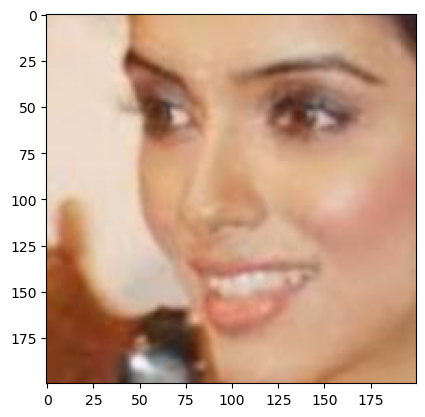

In [16]:
img = Image.open("/Smart Ad/UTKFace/"+df['image'][3])
plt.imshow(img)
